## Analyzing data using Python

###  Import libraries

In [1]:
!pip install seaborn

In [51]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load and read data from local disk

Source: https://www.kaggle.com/ionaskel/laptop-prices#laptops.csv

In [3]:
laptop_data = pd.read_csv('datasets/laptops.csv', encoding='ISO-8859-1', index_col=0)

laptop_data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
laptop_data.shape

(1303, 12)

In [5]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 12 columns):
Company             1303 non-null object
Product             1303 non-null object
TypeName            1303 non-null object
Inches              1303 non-null float64
ScreenResolution    1303 non-null object
Cpu                 1303 non-null object
Ram                 1303 non-null object
Memory              1303 non-null object
Gpu                 1303 non-null object
OpSys               1303 non-null object
Weight              1303 non-null object
Price_euros         1303 non-null float64
dtypes: float64(2), object(10)
memory usage: 132.3+ KB


In [6]:
laptop_data.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [7]:
laptop_data.describe()

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


In [8]:
laptop_data.drop(['Product', 
                  'ScreenResolution', 
                  'Cpu', 
                  'Memory', 
                  'Gpu', 
                  'Weight'], inplace=True, axis=1)

In [9]:
laptop_data.sample(10)

,Company,TypeName,Inches,Ram,OpSys,Price_euros
213,Lenovo,Notebook,15.6,8GB,Windows 10,597.00
751,Lenovo,2 in 1 Convertible,14.0,8GB,Windows 10,999.00
1112,MSI,Gaming,17.3,8GB,Windows 10,1599.00
1133,Toshiba,Ultrabook,13.3,16GB,Windows 10,2226.00
382,Lenovo,Netbook,11.6,4GB,Windows 10,553.00
988,Asus,Gaming,17.3,16GB,Windows 10,2049.90
1059,HP,Notebook,15.6,8GB,Windows 10,2103.34
546,Lenovo,Notebook,14.0,8GB,Windows 10,859.00
597,Asus,2 in 1 Convertible,15.6,8GB,Windows 10,739.00
39,HP,Notebook,15.6,4GB,Windows 10,488.69


In [10]:
laptop_data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [11]:
laptop_data.TypeName.value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [12]:
laptop_data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [13]:
laptop_data.Company.value_counts()

Lenovo       297
Dell         297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
LG             3
Google         3
Fujitsu        3
Chuwi          3
Huawei         2
Name: Company, dtype: int64

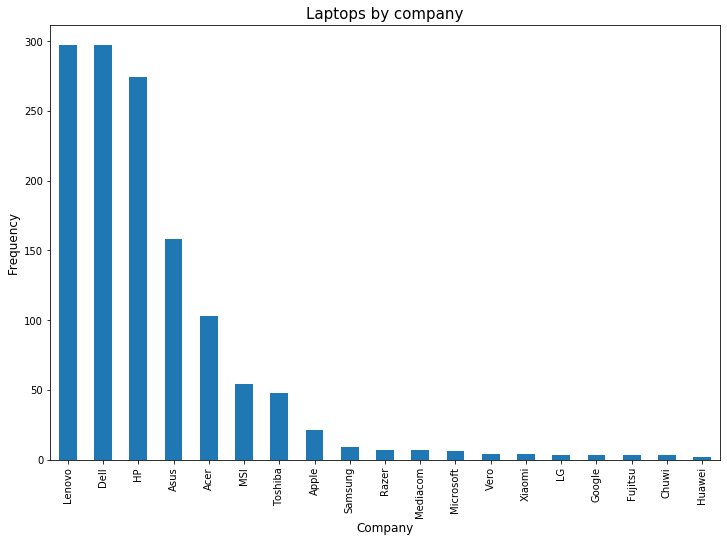

In [14]:
plt.figure(figsize=(12, 8))

laptop_data['Company'].value_counts().plot(kind='bar')

plt.title('Laptops by company', fontsize=15)

plt.xlabel('Company', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

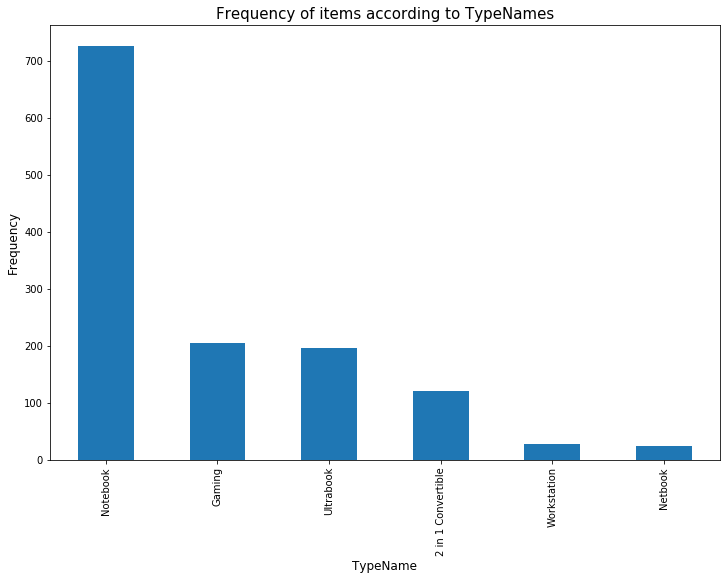

In [15]:
plt.figure(figsize=(12, 8))

laptop_data['TypeName'].value_counts().plot(kind='bar')

plt.title('Frequency of items according to TypeNames', fontsize=15)
plt.xlabel('TypeName', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

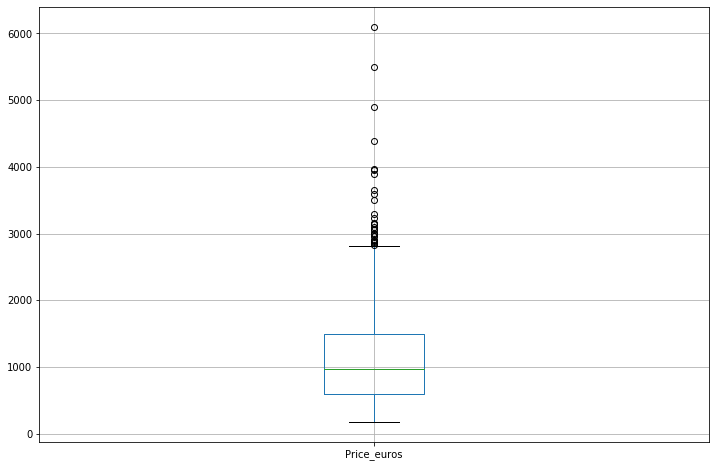

In [18]:
plt.figure(figsize=(12, 8))

laptop_data[['Price_euros']].boxplot()

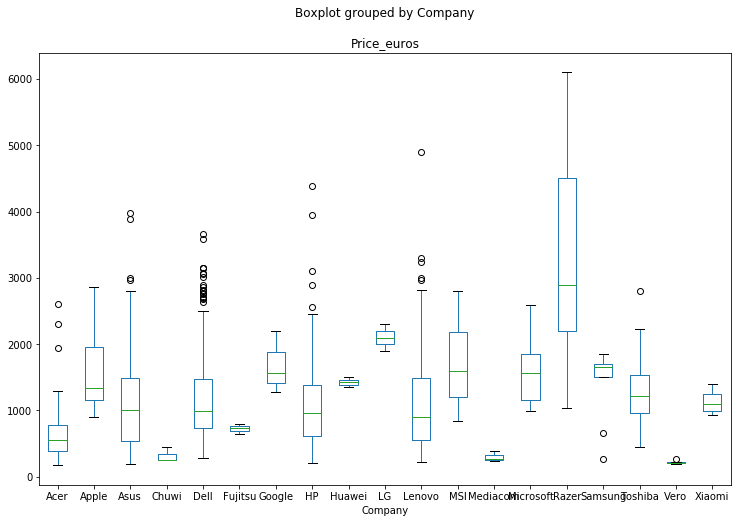

In [19]:
laptop_data.boxplot(by = 'Company', column = ['Price_euros'],
                    grid = False, figsize=(12, 8))

plt.show()

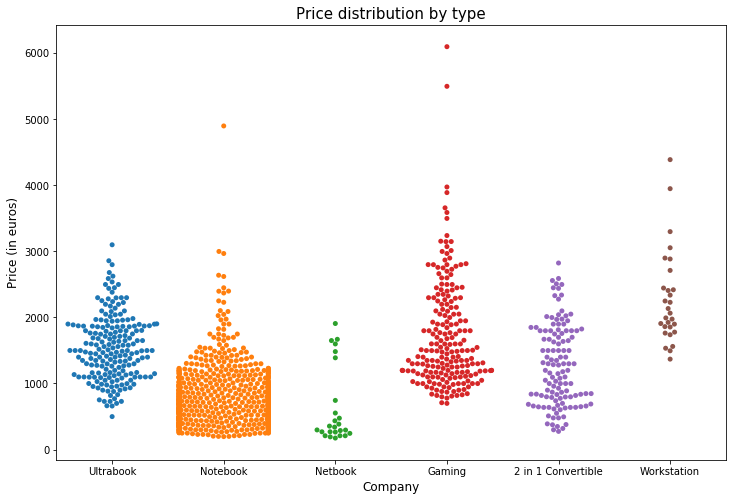

In [20]:
plt.figure(figsize=(12, 8))

sns.swarmplot(x='TypeName', y='Price_euros', data=laptop_data)

plt.title('Price distribution by type', fontsize=15)

plt.xlabel('Company', fontsize=12)
plt.ylabel('Price (in euros)', fontsize=12)
plt.show()

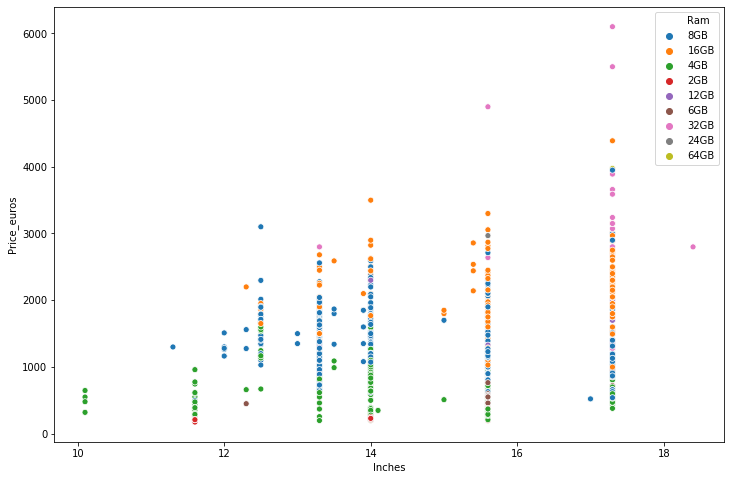

In [21]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='Inches', y='Price_euros', hue='Ram', data=laptop_data)

plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

laptop_data['TypeName'] = label_encoder.fit_transform(laptop_data['TypeName'])

In [23]:
laptop_data.head()

,Company,TypeName,Inches,Ram,OpSys,Price_euros
1,Apple,4,13.3,8GB,macOS,1339.69
2,Apple,4,13.3,8GB,macOS,898.94
3,HP,3,15.6,8GB,No OS,575.00
4,Apple,4,15.4,16GB,macOS,2537.45
5,Apple,4,13.3,8GB,macOS,1803.60


In [24]:
dummy_laptop_data = pd.get_dummies(laptop_data)

dummy_laptop_data.head()

,TypeName,Inches,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Ram_8GB,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
1,4,13.3,1339.69,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,4,13.3,898.94,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3,15.6,575.00,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,4,15.4,2537.45,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,4,13.3,1803.60,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [26]:
dummy_laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 40 columns):
TypeName              1303 non-null int32
Inches                1303 non-null float64
Price_euros           1303 non-null float64
Company_Acer          1303 non-null uint8
Company_Apple         1303 non-null uint8
Company_Asus          1303 non-null uint8
Company_Chuwi         1303 non-null uint8
Company_Dell          1303 non-null uint8
Company_Fujitsu       1303 non-null uint8
Company_Google        1303 non-null uint8
Company_HP            1303 non-null uint8
Company_Huawei        1303 non-null uint8
Company_LG            1303 non-null uint8
Company_Lenovo        1303 non-null uint8
Company_MSI           1303 non-null uint8
Company_Mediacom      1303 non-null uint8
Company_Microsoft     1303 non-null uint8
Company_Razer         1303 non-null uint8
Company_Samsung       1303 non-null uint8
Company_Toshiba       1303 non-null uint8
Company_Vero          1303 non-null uint8
Company

In [27]:
dummy_laptop_data.shape

(1303, 40)

In [28]:
X = dummy_laptop_data.drop('Price_euros', axis=1)

y = dummy_laptop_data['Price_euros']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
X_train.shape, X_test.shape

((1042, 39), (261, 39))

In [31]:
y_train.shape, y_test.shape

((1042,), (261,))

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
linear_regression.score(X_train, y_train)

0.669979684108118

In [34]:
y_pred = linear_regression.predict(X_test)

r2_score(y_test, y_pred)

0.6641123700864036

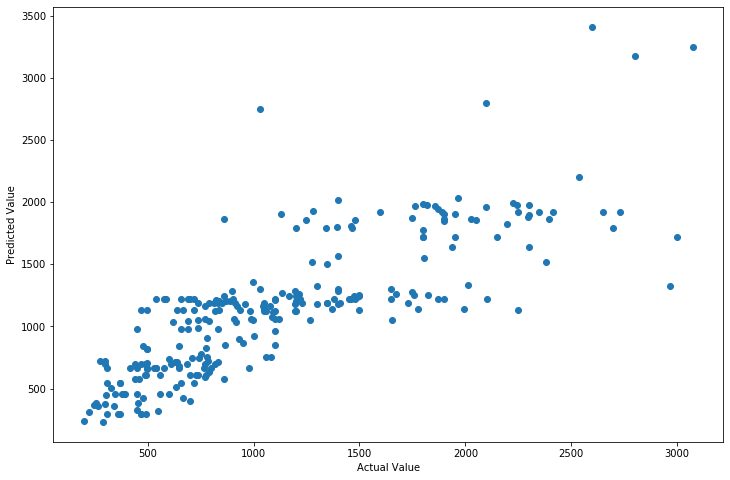

In [35]:
plt.figure(figsize = (12, 8))

plt.scatter(y_test, y_pred)

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

plt.show()